In [1]:
# basics
import os
import time
import numpy as np
import pandas as pd

# scipy and sklearn
from scipy.stats import entropy
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns
from IPython.display import Image
from matplotlib.patches import Rectangle

# CMDGB
import graphviz
from CMGDB import PlotMorseSets, PlotMorseGraph

# local
from data_loaders import retrieve_predictions
from models import *
from utils import get_model_weights, convert_weight_dict_to_dataframe, compute_morse_graph, \
                  compute_morse_graph_with_gpflow_gp, compute_order_retraction, PlotOrderRetraction

sns.set()
plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Timing Different Numbers of Model Weights
Due to the need to restart kernel before each run, will need to do this manually for each number of weights ...

Config:

** Make sure to restart kernel before each new config run! Easiest way is to click on "Restart & Run All"

In [3]:
# Pick interesting_iris from: ["iris_baseline", "iris_layers_2", "iris_epoch_450"]
interesting_iris = "iris_epoch_450"
# Pick smallest_or_largest from: ["smallest", "largest"]
smallest_or_largest = "largest"

[-2.61753082 -2.89198698]


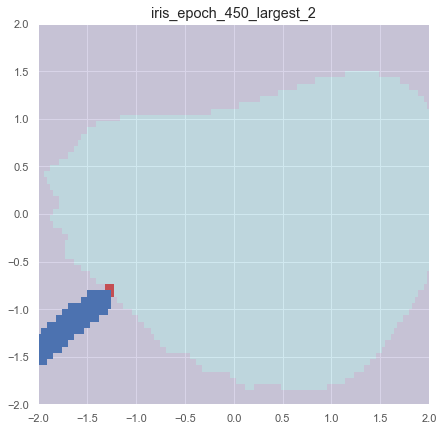

time = 70.37 seconds


In [4]:
weights = get_model_weights("./data/{}".format(interesting_iris))
weights = convert_weight_dict_to_dataframe(weights)

final_weights = weights.loc[weights["epoch"] != "1"]    
weight_cols = [c for c in list(final_weights.columns) if c not in ["model_id", "epoch", "val_loss"]]
std_df = pd.DataFrame(columns=["weight_name", "std"],
                      data=list(zip(weight_cols, [np.std(final_weights[col]) for col in weight_cols])))
std_df = std_df.sort_values(by="std")

chosen_weights = list(std_df["weight_name"])[-2:]

start_time = time.time()
morseg, mapg = compute_morse_graph(weights[['epoch'] + chosen_weights], phase_subdiv=15)
compute_order_retraction(morseg, mapg, title="{}_{}_2".format(interesting_iris, smallest_or_largest))
print("time = {:.2f} seconds".format(time.time() - start_time))

In [5]:
df = pd.DataFrame(columns=["Number of Weights", "Time (seconds)"])
df.loc[len(df)] = [2, 70.76]
df.loc[len(df)] = [3, 142.39]
df.loc[len(df)] = [4, 257.30]
df.loc[len(df)] = [5, 611.37]

In [6]:
df["Number of Weights"] = df["Number of Weights"].astype(int)
df

,Number of Weights,Time (seconds)
0,2,70.76
1,3,142.39
2,4,257.30
3,5,611.37


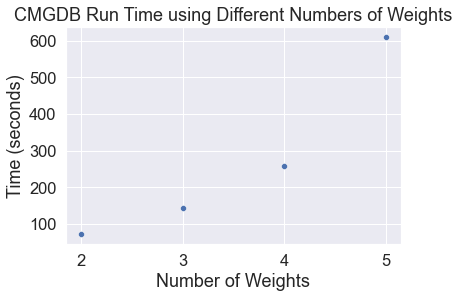

In [8]:
sns.set(font_scale=1.5, font="Arial")
sns.scatterplot(data=df, x="Number of Weights", y="Time (seconds)")

plt.xticks(df["Number of Weights"])
plt.title("CMGDB Run Time using Different Numbers of Weights")

plt.show()